In [2]:
import pandas as pd
from binance.client import Client
from binance import BinanceSocketManager

In [32]:
run credentials.ipynb

In [34]:
client = Client(key, secret)

In [68]:
run functions.ipynb

In [36]:
run db_helper.ipynb

In [37]:
engine = create_db('SOLBUSD')

In [38]:
df = pd.read_sql('SOLBUSD', engine)

<AxesSubplot:>

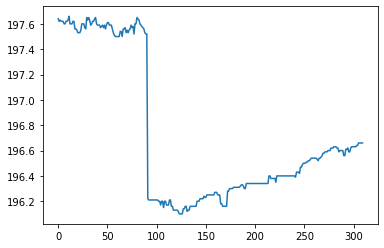

In [39]:
df.Price.plot()

In [20]:
#Trendfollowing
#If the crypto was rising by x % -> Buy
#Exit when profit is > 0.15 % or loss is crossing - 0.15% 

In [ ]:
def open_position(symbol, entry, loopback, opts):
    while True:
        df = pd.read_sql(symbol, engine)        
        loopback_period = df.iloc[-loopback:]
        cumret = get_cumulative_return(loopback_period.Price)
        if cumret[cumret.last_valid_index()] > entry:
            return market_order(symbol=symbol, side='BUY', quantity=opts['qtty'])

In [ ]:
def close_position(symbol, order, loopback, opts):
    while True:
        df = pd.read_sql(symbol, engine)
        sincebuy = df.loc[df.Time > pd.to_datetime(order['transactTime'], unit='ms')]
        if len(sincebuy) > 1:
            sincebuyret = get_cumulative_return(sincebuy.Price)
            last_entry = sincebuyret[sincebuyret.last_valid_index()]
            if last_entry > (opts['pct'] / 100) or last_entry < -(opts['pct'] / 100):
                return market_order(symbol=symbol, side='SELL', quantity=opts['qtty'])
            

In [ ]:
def live_trading_strategy(symbol, entry, loopback, opts):
    order = open_position(symbol, entry, loopback, opts)
    print(order)
    order = close_position(symbol, order, loopback, )
    print(order)

In [ ]:
opts = {'opts':0.15, 'pct':0.15}
live_trading_strategy('SOLBUSD', 0.46, 60, opts)